In [1]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [38]:
# summary of data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels 

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show examples of dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [40]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
print(X_train[256], y_train[256])

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.] 1


In [ ]:
# 2 batch gradient descent (GD) for Logistic regression
def LogisticRegression_GD(X_train, y_train, learning_rate):
    #TODO
    c = np.unique(y_train).shape[0] # number of classes
    eta = 0.1
    n, d = X_train.shape # n = number of samples, d = number of features
    X_ext = np.hstack([X_train, np.ones((n, 1))])  # (n, d+1)
    W = np.random.randn(d+1, c) * 0.01
    Y_onehot = np.zeros((n, c))
    Y_onehot[np.arange(n), y_train] = 1.0
    max_iter = 1000
    prev_loss = 1e-4 + 1
    loss = []
    for iteration in range(max_iter):
        Z = X_ext @ W 
        Z_shifted = Z - np.max(Z, axis=1, keepdims=True)
        exp_Z = np.exp(Z_shifted)
        P = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
        ce = - np.mean(np.sum(Y_onehot * np.log(P + 1e-12), axis=1))
        reg_term = 0.5 * eta * np.sum(W[:d, :]**2)
        loss.append(ce + reg_term)
        if np.abs(prev_loss - loss[-1]) < 1e-4:
            print(f'Converged at iteration {iteration}')
            break
        prev_loss = loss[-1]
        grad = (1.0 / n) * (X_ext.T @ (P - Y_onehot))  # (d+1, c)
        grad[:d, :] += eta * W[:d, :] / n
        W -= learning_rate * grad
    return W[:d, :], W[d, :], loss

def predict(X, W, b):
    W = np.vstack([W, b.reshape(1, -1)])  # (d+1, c)
    n = X.shape[0]
    X_ext = np.hstack([X, np.ones((n, 1))])  # (n, d+1)
    Z = X_ext @ W 
    Z_shifted = Z - np.max(Z, axis=1, keepdims=True)
    exp_Z = np.exp(Z_shifted)
    P = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    return np.argmax(P, axis=1)

Converged at iteration 221


array([ 0.02026068,  0.00359819, -0.00811535,  0.00771321,  0.00942205,
       -0.00426077, -0.0023744 ,  0.00534632, -0.0050796 , -0.01702208])

---------------------------------------
learning rate = 0.05
Converged at iteration 111
training precision = 0.9829250185597624
test precision = 0.9666666666666667
loss (final) = 0.26840877817642206
---------------------------------------
learning rate = 0.005
Converged at iteration 335
training precision = 0.9762435040831478
test precision = 0.9644444444444444
loss (final) = 0.18587221056682107
---------------------------------------
learning rate = 0.01
Converged at iteration 219
training precision = 0.9769858945805494
test precision = 0.9644444444444444
loss (final) = 0.17946517195606315


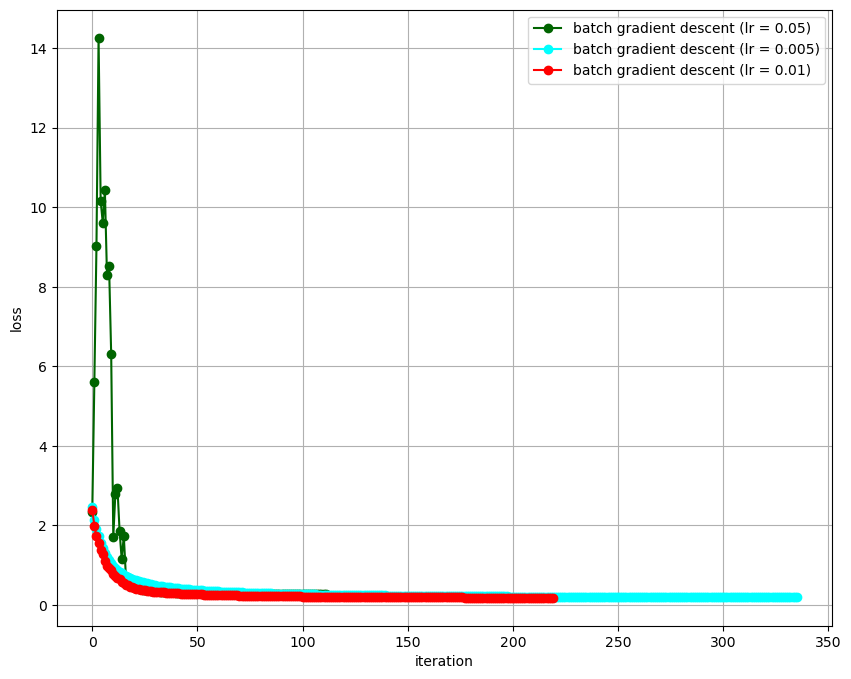

In [110]:
# evaluation of different learning rate
learning_rate = [5.0e-2, 5.0e-3, 1.0e-2]
cl = ['darkgreen', 'cyan', 'red']
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(learning_rate)):
    print('---------------------------------------')
    print('learning rate =', learning_rate[i])
    W, b, loss_GD = LogisticRegression_GD(X_train, y_train, learning_rate[i])

    #TODO
    y_pred_train = predict(X_train, W, b)  # (n, c) -> (n,)
    prec_train = np.mean(y_pred_train == y_train)  # training precision
    print('training precision =', prec_train)

    #TODO
    y_pred_test = predict(X_test, W, b)  # (n, c) -> (n,)
    prec_test = np.mean(y_pred_test == y_test)  # test precision
    print('test precision =', prec_test)
    print('loss (final) =', loss_GD[-1])
    plt.plot(loss_GD, c = cl[i], ls = '-', marker = 'o', label = 'batch gradient descent (lr = ' + str(learning_rate[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')
# output plt to pdf file 
plt.savefig('logistic_regression_loss.pdf', format='pdf', dpi=300)
plt.show()

In [76]:
# 4 stochastic gradient descent (SGD) for Logistic regression

def LogisticRegression_SGD(X, y, batch_size, lr=1.0e-2, eta=2.0e-1, eps = 1.0e-4, max_epoch=500):

    #TODO: initialization
    notstop = True
    epoch = 0
    loss = []
    n, d = X.shape
    # shuffle the data at each epoch
    indices = np.arange(n)
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    # add bias term
    X_ext = np.hstack([X_shuffled, np.ones((n, 1))])
    W = np.random.randn(d + 1, np.unique(y).shape[0]) * 0.01
    Y_onehot = np.zeros((n, W.shape[1]))
    Y_onehot[np.arange(n), y_shuffled] = 1.0

    # optimization loop
    while notstop and epoch < max_epoch:
        #TODO: SGD of each epoch
        # loop over mini-batches
        for start in range(0, n, batch_size):
            end = start + batch_size
            if end > n:
                end = n
            X_mini = X_ext[start:end]
            Y_mini = Y_onehot[start:end]
            # compute Z, P, and loss
            Z = X_mini @ W
            Z_shifted = Z - np.max(Z, axis=1, keepdims=True)
            exp_Z = np.exp(Z_shifted)
            P = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
            # compute gradient
            grad = (1.0 / (end - start)) * (X_mini.T @ (P - Y_mini))
            grad[:d, :] += eta * W[:d, :] / (end - start)
            # update W
            W -= lr * grad
        # compute loss for the current epoch
        Z = X_ext @ W
        Z_shifted = Z - np.max(Z, axis=1, keepdims=True)
        exp_Z = np.exp(Z_shifted)
        P = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
        ce = - np.mean(np.sum(Y_onehot * np.log(P + 1e-12), axis=1))
        reg_term = 0.5 * eta * np.sum(W[:d, :]**2)
        loss.append(ce + reg_term)
        # print(f'Epoch {epoch}, Loss: {loss[-1]}')
        # half lr if not improving in 10 epochs
        if epoch > 10:
            if loss[epoch - 10] <= loss[epoch] - eps:
                lr *= 0.5
                print('reduce learning rate to', lr)

        # stop if not improving in 20 epochs
        if epoch > 20:
            if loss[epoch - 20] <= loss[epoch] - eps or abs(loss[epoch] - loss[epoch-1]) <= eps:
                notstop = False
                break
        epoch += 1
    #TODO: W and b
    W, b = W[:d, :], W[d, :]
    print('Final epoch:', epoch)
    return W, b, loss
LogisticRegression_SGD(X_train, y_train, batch_size=100, lr=1.0e-2)

reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
Final epoch: 21


(array([[ 1.94156791e-02, -1.29960541e-02, -5.42513784e-03,
          4.06577745e-03, -1.57600945e-03, -8.88225263e-03,
         -4.55378721e-03, -1.82943534e-02,  3.96398278e-04,
          1.08575902e-02],
        [-2.25055280e-02, -1.75936134e-02,  8.84574934e-03,
          2.64644475e-02,  1.01099820e-03,  1.74103579e-02,
          5.30672598e-04,  6.58958188e-03, -4.70224563e-03,
         -7.00097405e-04],
        [-4.68768059e-03, -2.68380668e-02,  4.47317007e-02,
          1.42299621e-03, -3.81884215e-02,  1.03170875e-01,
         -7.17075628e-02,  2.06531056e-02, -3.50671914e-02,
         -2.35436761e-02],
        [ 2.15171026e-02, -8.91698793e-03,  2.35320208e-02,
          4.31012533e-02, -8.15226451e-02, -1.52111742e-02,
         -2.88228498e-02,  5.38633387e-02, -5.03506207e-02,
          5.01891215e-02],
        [-4.80184150e-03, -1.30821690e-01, -1.99505728e-03,
          9.80455554e-02, -3.27172909e-02,  2.92762618e-02,
         -3.36361328e-02,  4.82685017e-02, -3.089909

Learning rate = 0.01
---------------------------------------
batch_size = 10
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
reduce learning rate to 0.0003125
reduce learning rate to 0.00015625
reduce learning rate to 7.8125e-05
Final epoch: 21
Learning rate 0.01, batch_size 10, training precision = 0.996, test precision = 0.971, final loss = 0.4623
---------------------------------------
batch_size = 50
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
reduce learning rate to 0.0003125
reduce learning rate to 0.00015625
reduce learning rate to 7.8125e-05
reduce learning rate to 3.90625e-05
reduce learning rate to 1.953125e-05
Final epoch: 21
Learning rate 0.01, batch_size 50, training precision = 0.985, test precision = 0.971, final loss = 0.2724
---------------------------------------
batch_size = 100
reduce learning rate to 0.005
r

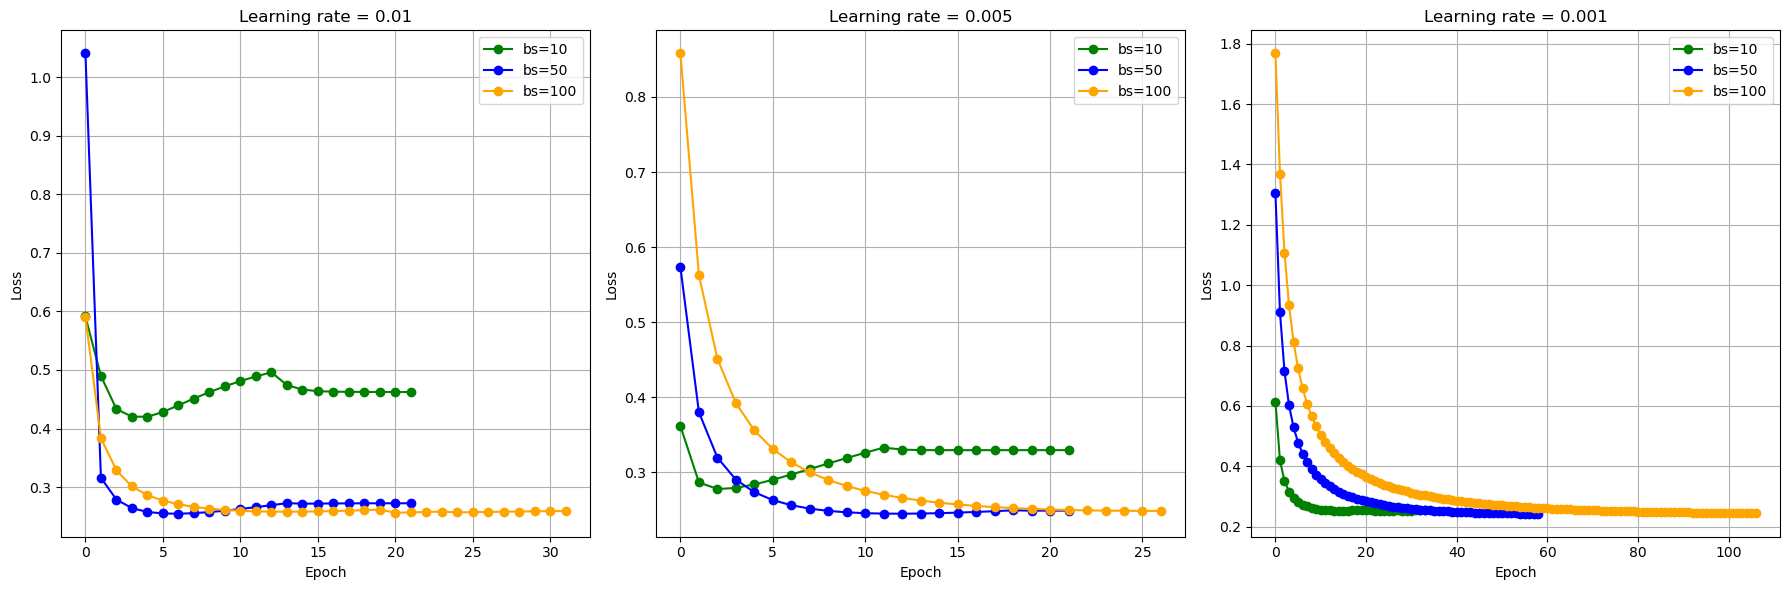

In [109]:
import numpy as np
import matplotlib.pyplot as plt
batch_sizes = [10, 50, 100]
batch_colors = ['green', 'blue', 'orange']
learning_rates = [1.0e-2, 5.0e-3, 1.0e-3]
fig, axes = plt.subplots(1, len(learning_rates), figsize=(6*len(learning_rates), 6))
for i, lr in enumerate(learning_rates):
    ax = axes[i]
    print('======================================')
    print(f'Learning rate = {lr}')
    for j, bs in enumerate(batch_sizes):
        print('---------------------------------------')
        print(f'batch_size = {bs}')
        W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, batch_size=bs, lr=lr, eta=2.0e-1, eps=1.0e-4, max_epoch=500)
        prec_train = np.mean(predict(X_train, W, b) == y_train)
        prec_test  = np.mean(predict(X_test, W, b) == y_test)
        print(f'Learning rate {lr}, batch_size {bs}, training precision = {prec_train:.3f}, test precision = {prec_test:.3f}, final loss = {loss_SGD[-1]:.4f}')
        ax.plot(loss_SGD, color=batch_colors[j], marker='o', ls='-', 
                label=f'bs={bs}')
    
    ax.set_title(f'Learning rate = {lr}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig('logistic_regression_loss_sgd_subplots.pdf', format='pdf', dpi=300)
plt.show()


---------------------------------------
batch_size = 10
reduce learning rate to 0.0005
reduce learning rate to 0.00025
reduce learning rate to 0.000125
reduce learning rate to 6.25e-05
Final epoch: 22
training precision = 0.9814402375649591
test precision = 0.9688888888888889
final loss = 0.2476137469405809
---------------------------------------
batch_size = 50
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
reduce learning rate to 0.0003125
reduce learning rate to 0.00015625
Final epoch: 22
training precision = 0.9821826280623608
test precision = 0.9733333333333334
final loss = 0.2495433332889995
---------------------------------------
batch_size = 100
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
Final epoch: 21
training precision = 0.9806978470675576
test precision = 0.9711111111111111
final loss = 0.25273043947523155


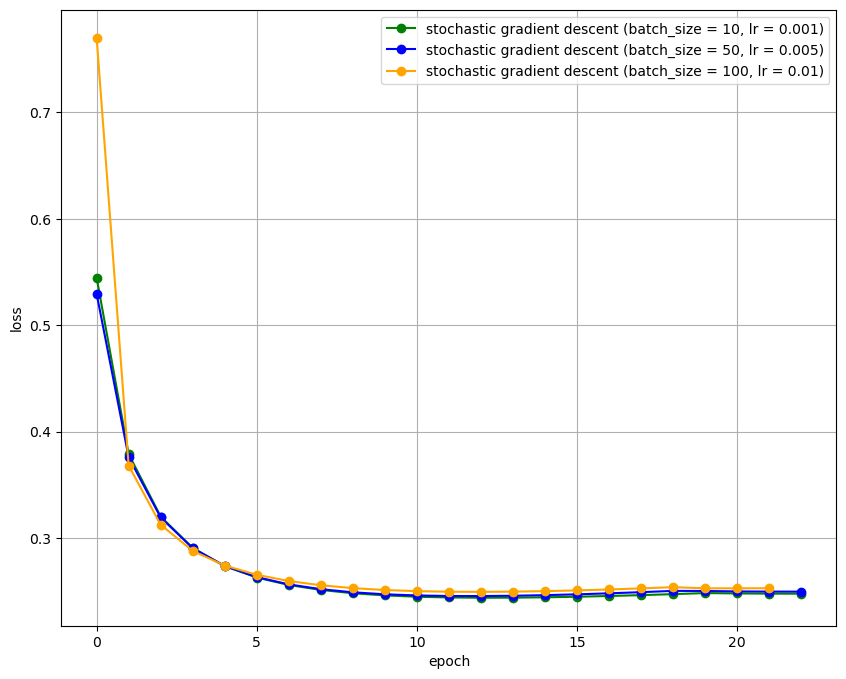

In [123]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
lr = [1.0e-2] * 3
lr = [lr[i] * bs[i] / 100 for i in range(len(bs))]  # scale learning rate by batch size, e.g. lr = 1.0e-2 for bs=100, 2*10^-2 for bs=50, 5*10^-2 for bs=10
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):
    
    print('---------------------------------------')
    print('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)

    #TODO
    prec_train = np.mean(predict(X_train, W, b) == y_train)  # training precision
    print('training precision =', prec_train)

    #TODO
    prec_test = np.mean(predict(X_test, W, b) == y_test)  # test precision
    print('test precision =', prec_test)
    print(f"final loss = {loss_SGD[-1]}" )

    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ', lr = ' + str(lr[i]) + ')')


plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('logistic_regression_loss_sgd_dynamic.pdf', format='pdf', dpi=300)
plt.show()